In [1]:
# 凝集型クラスタリング。ある原則に基づく一連のクラスタリングアルゴリズム
# これらのアルゴリズムは、個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
# これを何らかの終了条件が満たされるまで繰り返す。sklearnに実装されている終了条件はクラスタの数である
# 「最も類似したクラスタ」を決定する連結度で、sklearnに実装されているものは次の3つ。連結度は常に、2つの既存クラスタ間に定義される
# ward:デフォルト。併合した際にクラスタ内の分散の増分が最小になるように2つのクラスタを選択する
# average:クラスタ間のすべてのポイント間の距離の平均値が最小の2クラスタを併合する
# complete:2つのクラスタの点間の距離の最大値が最小となるものを併合する
# 基本はwardで良いが、極端なデータセットの場合（例えば1つだけ他のものよりもずっと大きい等）は、averageやcompeteの方が良いかもしれない
# アルゴリズムの関係上、凝集型クラスタリングは新しいデータに対して予測することができないため、AgglomerativeClusteringにはpredictメソッドがない
# モデルを作って訓練セットに対する所属クラスタを得るには、fit_predictを用いるか、k-meansと同じようにlabels_属性を見る

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

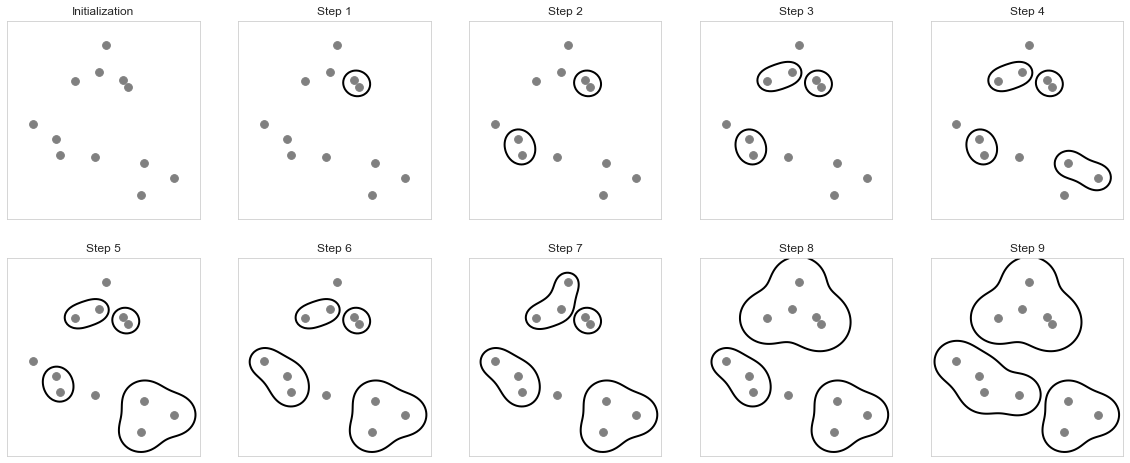

In [3]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

(100, 2) (100,)
True


Text(0, 0.5, 'Feature 1')

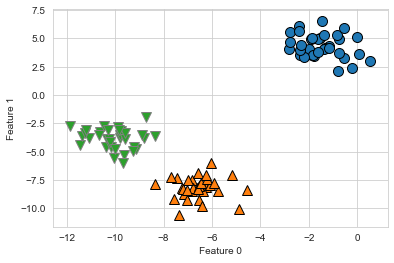

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 1)
print(X.shape, y.shape)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)
print(np.all(assignment == agg.labels_))

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h4>階層型クラスタリングとデンドログラム</h4>

In [5]:
# 凝集型クラスタリングを行うと、いわゆる階層型クラスタリングが行われる
# 繰り返しの各ステップ終了時のクラスタ数はそれぞれ異なる。すべての可能なクラスタリングを合わせて表示すると役に立つ場合がある
# 階層型クラスタリングを可視化するには、デンドログラムと呼ばれる方法があり、この方法は多次元のデータセットを扱うことができる
# sklearnは今のところ（2021/7/22現在）デンドログラムの描画をサポートしていないが、scipyを使えば簡単にできる

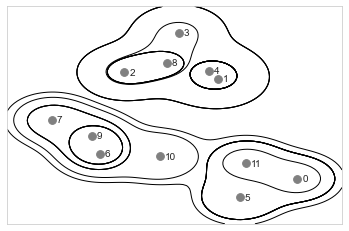

In [6]:
mglearn.plots.plot_agglomerative()

(11, 4)
[[ 1.          4.          0.3320945   2.        ]
 [ 6.          9.          0.64580193  2.        ]
 [ 2.          8.          0.92683223  2.        ]
 [ 0.         11.          1.1803787   2.        ]
 [ 5.         15.          1.30311575  3.        ]
 [ 7.         13.          1.4440339   3.        ]
 [ 3.         14.          1.60041812  3.        ]
 [12.         18.          2.07815795  5.        ]
 [10.         17.          2.15981886  4.        ]
 [16.         20.          6.55024854  7.        ]
 [19.         21.          7.92446877 12.        ]]


Text(0, 0.5, 'Cluster distance')

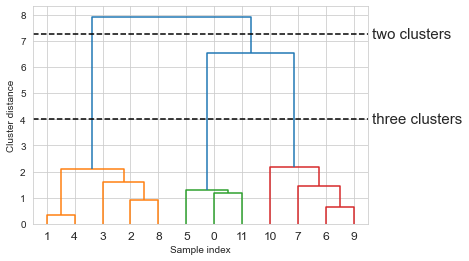

In [7]:
# scipyのward関数は、凝集型クラスタリングを行った際のブリッジ距離を示す配列(併合するクラスタの番号とその距離)を返す
# デンドログラムのy軸はアルゴリズムがいつ2つのクラスタを併合したか、枝の長さが2つのクラスタがどれだけ離れていたかを示している
# 凝集型クラスタリングでもtwo_moonsのような複雑な形状はうまく扱うことができない
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state = 0, n_samples = 12)

linkage_array = ward(X) # 併合後に新たにできるクラスタには、新たなクラスタ番号？が ふられる
print(linkage_array.shape)
print(linkage_array)

dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], "--", c = "k")
ax.plot(bounds, [4, 4], "--", c = "k")
ax.text(bounds[1], 7.25, " two clusters", va = "center", fontdict = {"size":15})
ax.text(bounds[1], 4, " three clusters", va = "center", fontdict = {"size":15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")